<a href="https://colab.research.google.com/github/JARIN-TIAS/Computer-Vision/blob/main/U_Net_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 838ms/step


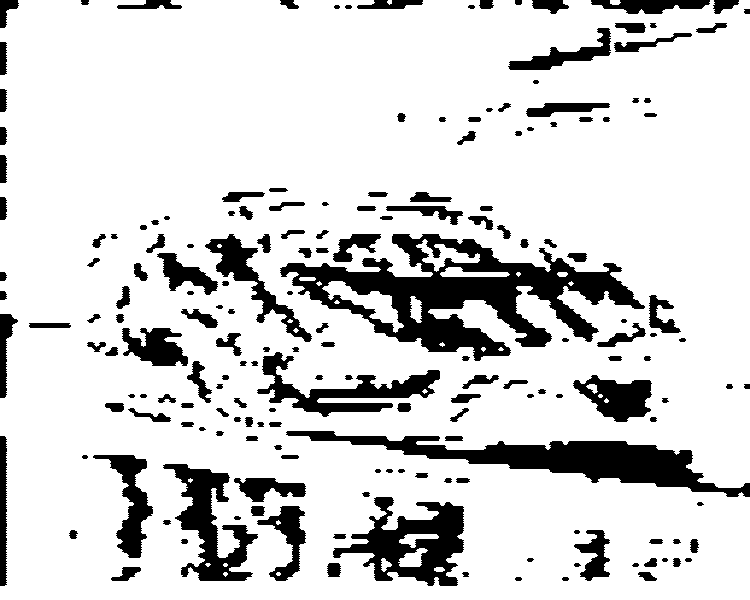

In [5]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate, Dropout
from tensorflow.keras.models import Model
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Define the U-Net model
def unet_model(input_size=(128, 128, 3), num_classes=1):
    inputs = Input(input_size)

    # Encoder
    c1 = Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
    c1 = Conv2D(64, (3, 3), activation='relu', padding='same')(c1)
    p1 = MaxPooling2D((2, 2))(c1)

    c2 = Conv2D(128, (3, 3), activation='relu', padding='same')(p1)
    c2 = Conv2D(128, (3, 3), activation='relu', padding='same')(c2)
    p2 = MaxPooling2D((2, 2))(c2)

    c3 = Conv2D(256, (3, 3), activation='relu', padding='same')(p2)
    c3 = Conv2D(256, (3, 3), activation='relu', padding='same')(c3)
    p3 = MaxPooling2D((2, 2))(c3)

    c4 = Conv2D(512, (3, 3), activation='relu', padding='same')(p3)
    c4 = Conv2D(512, (3, 3), activation='relu', padding='same')(c4)
    d4 = Dropout(0.5)(c4)
    p4 = MaxPooling2D((2, 2))(d4)

    # Bottleneck
    c5 = Conv2D(1024, (3, 3), activation='relu', padding='same')(p4)
    c5 = Conv2D(1024, (3, 3), activation='relu', padding='same')(c5)
    d5 = Dropout(0.5)(c5)

    # Decoder
    u6 = UpSampling2D((2, 2))(d5)
    u6 = concatenate([u6, c4])
    c6 = Conv2D(512, (3, 3), activation='relu', padding='same')(u6)
    c6 = Conv2D(512, (3, 3), activation='relu', padding='same')(c6)

    u7 = UpSampling2D((2, 2))(c6)
    u7 = concatenate([u7, c3])
    c7 = Conv2D(256, (3, 3), activation='relu', padding='same')(u7)
    c7 = Conv2D(256, (3, 3), activation='relu', padding='same')(c7)

    u8 = UpSampling2D((2, 2))(c7)
    u8 = concatenate([u8, c2])
    c8 = Conv2D(128, (3, 3), activation='relu', padding='same')(u8)
    c8 = Conv2D(128, (3, 3), activation='relu', padding='same')(c8)

    u9 = UpSampling2D((2, 2))(c8)
    u9 = concatenate([u9, c1])
    c9 = Conv2D(64, (3, 3), activation='relu', padding='same')(u9)
    c9 = Conv2D(64, (3, 3), activation='relu', padding='same')(c9)

    # Output Layer
    outputs = Conv2D(num_classes, (1, 1), activation='sigmoid')(c9)

    model = Model(inputs=[inputs], outputs=[outputs])

    return model

# Load an image
image_path = "/content/lam.jpg"
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
original_size = image.shape[:2]

# Resize image to match the model input size
input_size = (128, 128)
resized_image = cv2.resize(image, input_size)
normalized_image = resized_image / 255.0  # Normalize to [0, 1]

# Add batch dimension
input_image = np.expand_dims(normalized_image, axis=0)

# Load the trained U-Net model
model = unet_model()  # Or load_model("path_to_your_model.h5") if saved
output = model.predict(input_image)

# Postprocess the output
segmentation_map = (output[0, :, :, 0] > 0.5).astype(np.uint8)  # Binary threshold
segmentation_map = cv2.resize(segmentation_map, original_size[::-1])  # Resize to original size

# Save or display the segmentation map
cv2.imwrite("segmentation_result.png", segmentation_map * 255)
cv2_imshow(segmentation_map * 255)
